In [75]:
import numpy as np      # mathematical functions
import pandas as pd     # Import and manage Datasets
import matplotlib.pyplot as plt 
import seaborn as sns
import random 

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [76]:
df = pd.read_csv('country_vaccinations.csv')

In [77]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [78]:
df_prcc = df.drop(['vaccines','source_name','source_website'],axis=1) # Drop rowwise 

In [79]:
df_prcc.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [80]:
df_prcc['date']=pd.to_datetime(df.date)

In [82]:
train_data = df.copy()

In [83]:
train_data = train_data.drop(['iso_code','date','daily_vaccinations_raw','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                 'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','vaccines','source_website'],axis=1)

In [84]:
cntry_vs_ttl_vcc = train_data[['country','total_vaccinations']]

In [85]:
cntry_vs_ttl_vcc = pd.DataFrame(cntry_vs_ttl_vcc.groupby('country').sum()) 
cntry_vs_ttl_vcc.head()

,total_vaccinations
country,
Afghanistan,926702.0
Albania,15518217.0
Algeria,75030.0
Andorra,217053.0
Angola,2178329.0


In [86]:
cntry_vs_ttl_vcc.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'Wales', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=211)

In [87]:
cntry_vs_ppl_vcc = train_data.groupby(['country','total_vaccinations']).first()

In [88]:
cntry_vs_ppl_vcc = cntry_vs_ppl_vcc.groupby(['country']).sum()
cntry_vs_ppl_vcc.head()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations
country,,,
Afghanistan,871078.0,55624.0,29150.0
Albania,459256.0,190237.0,524622.0
Algeria,0.0,0.0,3778.0
Andorra,128692.0,26948.0,5598.0
Angola,2138134.0,40195.0,81004.0


In [89]:
cntry_vs_ttl_vcc= pd.DataFrame(cntry_vs_ttl_vcc.total_vaccinations.sort_values(ascending=False),columns=['total_vaccinations'])

In [90]:
#Since the total vaccination numbers are very long , to make them easier to read we can divide the GDP number by 10 billion.
cntry_vs_ttl_vcc['total_vaccinations_mdf'] = cntry_vs_ttl_vcc.loc[:,'total_vaccinations']/100000000000

C:\Users\khans\AppData\Local\Temp/ipykernel_5212/4097061746.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plot_data_df_bar['Country'],ha = 'left')


Text(-0.35, 0.925, 'Covid Total Vaccinations')

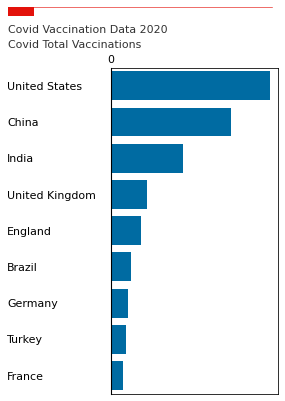

In [91]:
fig , ax = plt.subplots(figsize = (3,6))

# Create grid
# zorder tells it which layer to plut it on. We are setting this to 1 and our datat to 2 so the grid is behind the data.
ax.grid(which="major",axis='x',color = '#758D99',alpha = 0.6,zorder = 1)

# Make left spine slightly thicker 
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

plot_data = cntry_vs_ttl_vcc.iloc[:,1]
plot_data_df = pd.DataFrame({'Country': plot_data.index,'Total_Vaccinations':plot_data.values})
plot_data_df_bar = plot_data_df.sort_values(by = 'Total_Vaccinations', ascending=True).tail(9)

#Plot Data 
ax.barh(plot_data_df_bar['Country'],plot_data_df_bar['Total_Vaccinations'],color = '#006BA2',zorder =2)

#set custome labels for x-axis
ax.set_xticks([0,5,10,15,20])
ax.set_xticklabels([0,5,10,15,20])

#Refromat x-axis tick labels 
ax.xaxis.set_tick_params(labeltop = True, labelbottom = False , bottom = False, labelsize = 11, pad =-1)

#Reformat y-axis tick labels 
ax.set_yticklabels(plot_data_df_bar['Country'],ha = 'left')
ax.yaxis.set_tick_params(pad = 100,labelsize = 11,bottom = False)

#Shrink y-lim to make plot a bit tighten
ax.set_ylim(-0.5,8.5)

#Add in line and tag 

ax.plot([-0.35,0.87],[1.02,1.02],transform = fig.transFigure,clip_on = False, color = '#E3120B',linewidth = 0.6)

ax.add_patch(plt.Rectangle((-0.35,1.02),0.12,-0.02,facecolor = '#E3120B',transform = fig.transFigure,clip_on = False, linewidth =0))

ax.text(x=-0.35,y=0.96,s="Covid Vaccination Data 2020", transform = fig.transFigure, ha ='left',fontsize =11,alpha = 0.8)

ax.text(x=-0.35,y=0.925,s="Covid Total Vaccinations",transform = fig.transFigure, ha = 'left',fontsize = 11, alpha = 0.8)